In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 

In [2]:
df = pd.read_csv(r"C:\Users\Gaurav Ugale\Desktop\PROJECTS Python\Project Tasks\Logistic Regression Titanic\Python_Project_4_Log.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# If there are Null values, Handle these

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


# Part-2: Working with Models

# Create the target data and feature data where target data is survived

In [10]:
X = df.drop(['Survived','Name','Ticket'],axis=1)
y = df.Survived

In [11]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,2,1,female,38.0,1,0,71.2833,C85,C
3,4,1,female,35.0,1,0,53.1000,C123,S
6,7,1,male,54.0,0,0,51.8625,E46,S
10,11,3,female,4.0,1,1,16.7000,G6,S
11,12,1,female,58.0,0,0,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...
871,872,1,female,47.0,1,1,52.5542,D35,S
872,873,1,male,33.0,0,0,5.0000,B51 B53 B55,S
879,880,1,female,56.0,0,1,83.1583,C50,C
887,888,1,female,19.0,0,0,30.0000,B42,S


# Apply label-encoding on categorical data

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
enc =LabelEncoder()

In [14]:
X['Sex'] = enc.fit_transform(X['Sex'])

In [15]:
X['Cabin'] = enc.fit_transform(X['Cabin'])
X['Embarked'] = enc.fit_transform(X['Embarked'])

In [16]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,2,1,0,38.0,1,0,71.2833,72,0
3,4,1,0,35.0,1,0,53.1000,48,2
6,7,1,1,54.0,0,0,51.8625,117,2
10,11,3,0,4.0,1,1,16.7000,131,2
11,12,1,0,58.0,0,0,26.5500,43,2
...,...,...,...,...,...,...,...,...,...
871,872,1,0,47.0,1,1,52.5542,91,2
872,873,1,1,33.0,0,0,5.0000,29,2
879,880,1,0,56.0,0,1,83.1583,61,0
887,888,1,0,19.0,0,0,30.0000,25,2


# Split the data into Training and testing Set

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Create a Logistic regression model for Target and feature data

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
clf.score(X_test,y_test)

0.6756756756756757

In [21]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score

In [22]:
y_pred = clf.predict(X_test)

# Display the Confusion Matrix

In [23]:
confusion_matrix(y_pred,y_test)

array([[ 6,  5],
       [ 7, 19]], dtype=int64)

# Find the Accuracy Score

In [24]:
accuracy_score(y_pred,y_test)

0.6756756756756757

# Find the Precision Score

In [25]:
precision_score(y_pred,y_test)

0.7916666666666666

# Find the Recall Score

In [26]:
recall_score(y_pred,y_test)

0.7307692307692307

# Find the F1 Score

In [27]:
f1_score(y_pred,y_test)

0.76

# Find the probability of testing data

In [28]:
y_prob = clf.predict_proba(X_test)

In [29]:
y_prob

array([[0.69477854, 0.30522146],
       [0.26401059, 0.73598941],
       [0.33177907, 0.66822093],
       [0.37906482, 0.62093518],
       [0.17568005, 0.82431995],
       [0.40611615, 0.59388385],
       [0.52500904, 0.47499096],
       [0.40485365, 0.59514635],
       [0.57160028, 0.42839972],
       [0.7415408 , 0.2584592 ],
       [0.05624927, 0.94375073],
       [0.09043637, 0.90956363],
       [0.2925418 , 0.7074582 ],
       [0.27682575, 0.72317425],
       [0.63718376, 0.36281624],
       [0.12720374, 0.87279626],
       [0.50763371, 0.49236629],
       [0.11989114, 0.88010886],
       [0.65885875, 0.34114125],
       [0.51243974, 0.48756026],
       [0.5023986 , 0.4976014 ],
       [0.26107383, 0.73892617],
       [0.1167353 , 0.8832647 ],
       [0.03481024, 0.96518976],
       [0.73166863, 0.26833137],
       [0.07931404, 0.92068596],
       [0.08469545, 0.91530455],
       [0.45073271, 0.54926729],
       [0.81800489, 0.18199511],
       [0.29433327, 0.70566673],
       [0.

# Display ROC Curve and find the AUC score

In [30]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

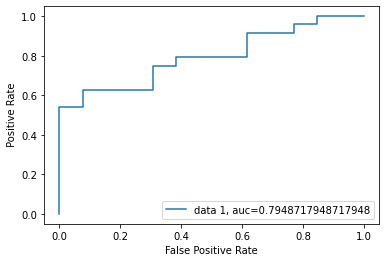

In [31]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, threshold = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc=" +str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel(" Positive Rate")

plt.show()